# Classificação do banco de dados Iris

Autores: Natanael Junior (natmourajr@lps.ufrj.br), Vinicius Mello (viniciusdsmello@poli.ufrj.br) e Pedro Lisboa (pedrohblisboa@gmail.com)

LPS - Laboratório de Processamento de Sinais
<center><img src="../data/logo_lps.jpg"></center>

### Carrega algumas bibliotecas de Python

Imprime um resumo de quanto tempo demorou para rodar a célula em questão
```python
%time
```

Carrega a biblioteca do sistema operacional
```python
import os
```

Carrega a biblioteca de computação numérica do python
```python
import numpy as np
```

Carrega a biblioteca Pandas (https://pandas.pydata.org), ótima ferramenta de análise de dados
```python
import pandas as pd
```

Carrega uma biblioteca MatplotLib (https://matplotlib.org), ótima ferramenta para a criação de gráficos
```python
import matplotlib.pyplot as plt
```

In [25]:
%time
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 12.2 µs


### Carga de dados do arquivo iris.csv

In [26]:
%time
df = pd.read_csv('../data/iris.csv')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


In [27]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [28]:
trgt = df['target']
#data = df.drop(['target'],axis = 1,inplace = True)
chosen_columns = ['sepal_length','sepal_width','petal_length','petal_width']
class_labels= ['Setosa', 'Versicolour', 'Virginica']

data = pd.DataFrame(df, columns = chosen_columns)

O processo de classificação será feito usando uma regressão logística em uma única característica.

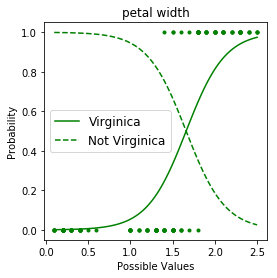

In [30]:
from sklearn.linear_model import LogisticRegression

n_pts = 100
m_colors = ['b', 'r', 'g']
m_labels = ['Setosa', 'Versicolour', 'Virginica']

fig = plt.figure(figsize=(4,4))

feature = 'petal_width'
trn_data = data[feature]
trn_data = trn_data[:,np.newaxis]
ax = plt.subplot(1,1,1)

nclass = 2
trn_trgt = (trgt==nclass).astype(np.int)

log_reg = LogisticRegression(penalty="l2",solver='lbfgs')
log_reg.fit(trn_data,trn_trgt)

syn_data = np.linspace(trn_data.min(), trn_data.max(),n_pts).reshape(-1,1)
data_proba = log_reg.predict_proba(syn_data)

plt.plot(trn_data,trn_trgt,".", color=m_colors[nclass],label='_nolegend_')
plt.plot(syn_data,data_proba[:,1],"-",
         color=m_colors[nclass],label='%s'%(m_labels[nclass]))
plt.plot(syn_data,data_proba[:,0],"--",
         color=m_colors[nclass],label='Not %s'%(m_labels[nclass]))

ax.set_title('%s'%(feature.replace('_',' ')))
ax.set_ylabel('Probability')
ax.set_xlabel('Possible Values')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc='best', fontsize=12);

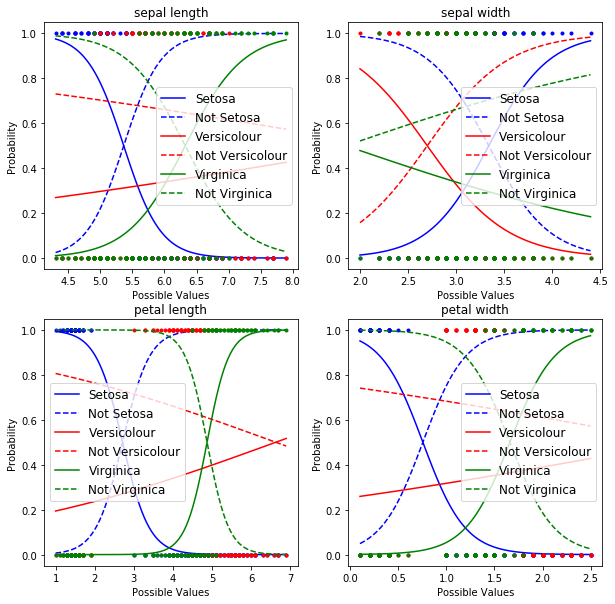

In [6]:
from sklearn.linear_model import LogisticRegression

n_pts = 100
m_colors = ['b', 'r', 'g']
m_labels = ['Setosa', 'Versicolour', 'Virginica']

fig = plt.figure(figsize=(10,10))

for ifeature, feature in enumerate(data.columns):
    trn_data = data[feature]
    trn_data = trn_data[:,np.newaxis]
    ax = plt.subplot(2,2,ifeature+1)
    for iclass, nclass in enumerate(np.unique(trgt)):
        trn_trgt = (trgt==nclass).astype(np.int)
        
        log_reg = LogisticRegression(solver='lbfgs')
        log_reg.fit(trn_data,trn_trgt)
        
        syn_data = np.linspace(trn_data.min(), trn_data.max(),n_pts).reshape(-1,1)
        data_proba = log_reg.predict_proba(syn_data)
        
        plt.plot(trn_data,trn_trgt,".", color=m_colors[iclass],label='_nolegend_')
        plt.plot(syn_data,data_proba[:,1],"-",
                 color=m_colors[iclass],label='%s'%(m_labels[iclass]))
        plt.plot(syn_data,data_proba[:,0],"--",
                 color=m_colors[iclass],label='Not %s'%(m_labels[iclass]))
        
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels,loc='best', fontsize=12);
    ax.set_title('%s'%(feature.replace('_',' ')))
    ax.set_ylabel('Probability')
    ax.set_xlabel('Possible Values')


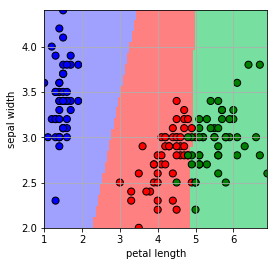

In [38]:
import matplotlib as mpl
cm_light = mpl.colors.ListedColormap(['#A0A0FF', '#FF8080', '#77E0A0'])
cm_dark = mpl.colors.ListedColormap(['b', 'r', 'g'])

feature1 = 'petal_length'
feature2 = 'sepal_width'

fig = plt.figure(figsize=(4,4))

trn_data = data[[feature1, feature2]]

log_reg = LogisticRegression(solver='lbfgs',multi_class="multinomial")
log_reg.fit(trn_data,trgt)
        

N, M = 100, 100
x1_min,x1_max = data[feature1].min(),data[feature1].max()
x2_min, x2_max = data[feature2].min(),data[feature2].max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)
x_test = np.stack((x1.flat, x2.flat), axis=1)

y_hat = log_reg.predict(x_test)
y_hat = y_hat.reshape(x1.shape)
ax = plt.subplot(1,1,1)
ax.pcolormesh(x1, x2, y_hat, cmap=cm_light);
ax.scatter(data[feature1], data[feature2], c=trgt,edgecolors='k', s=50, cmap=cm_dark)
ax.set_xlim([data[feature1].min(),data[feature1].max()])
ax.set_ylim([data[feature2].min(),data[feature2].max()])
ax.grid()
ax.set_xlabel('%s'%(feature1.replace('_',' ')));
ax.set_ylabel('%s'%(feature2.replace('_',' ')));

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

nfolds = 4
foldshandler = StratifiedKFold(n_splits=nfolds)
acc = []
precision = []

for ifold,(trainId,testId) in enumerate(foldshandler.split(data,trgt)):
    #if ifold != 0: continue
    #print(ifold,trainId, testId)
    trn_data = data.values[trainId]
    trn_trgt = trgt.values[trainId]
    
    tst_data = data.values[testId]
    tst_trgt = trgt.values[testId]
    
    log_reg = LogisticRegression(solver='lbfgs',multi_class="multinomial")
    log_reg.fit(trn_data,trn_trgt)
    
    pred_trn = log_reg.predict(trn_data)
    pred_trgt = log_reg.predict(tst_data)
    
    if ifold == 0:
        acc = accuracy_score(trn_trgt,pred_trn)
        precision = precision_score(tst_trgt,pred_trgt, average='macro')
    else:
        acc = np.append(acc,accuracy_score(trn_trgt,pred_trn))
        precision = np.append(precision,precision_score(tst_trgt,pred_trgt, average='macro'))
print('Acuracy:',acc)
print('Precision:',precision)

Acuracy: [0.96396396 0.97297297 0.99122807 0.96491228]
Precision: [0.97619048 0.97619048 0.95238095 1.        ]


/home/natmourajr/.virtualenvs/ieg/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [42]:
for ifold,(trainId,testId) in enumerate(foldshandler.split(data,trgt)):
        if ifold==3:
            print(data.values[trainId].shape)

(114, 4)


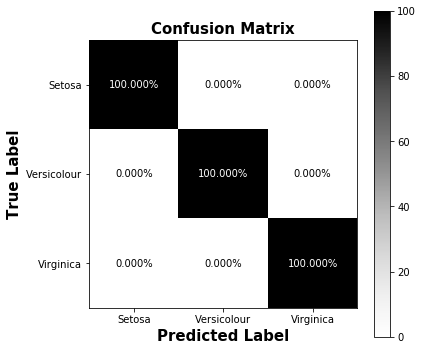

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

m_labels = ['Setosa', 'Versicolour', 'Virginica']

choose_fold = 3

fig = plt.figure(figsize=(6,6))

for ifold,(trainId,testId) in enumerate(foldshandler.split(data,trgt)):
    if ifold != choose_fold: continue
    #print(ifold,trainId, testId)
    trn_data = data.values[trainId]
    trn_trgt = trgt.values[trainId]
    
    tst_data = data.values[testId]
    tst_trgt = trgt.values[testId]
    
    log_reg = LogisticRegression(solver='lbfgs',multi_class="multinomial")
    log_reg.fit(trn_data,trn_trgt)
    pred_trgt = log_reg.predict(tst_data)
    
    cm = confusion_matrix(tst_trgt, pred_trgt)
    cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = 100.*cm
    
    ax = plt.subplot(1,1,1)
    im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Greys,clim=(0.0, 100.0))
    width, height = cm_normalized.shape

    for x in range(width):
        for y in range(height):
            if cm_normalized[x][y] < 50.:
                ax.annotate('%1.3f%%'%(cm_normalized[x][y]), xy=(y, x),
                            horizontalalignment='center',
                            verticalalignment='center')
            else:
                ax.annotate('%1.3f%%'%(cm_normalized[x][y]), xy=(y, x),
                            horizontalalignment='center',
                            verticalalignment='center',color='white')
    
    ax.set_title('Confusion Matrix',fontweight='bold',fontsize=15)
    fig.colorbar(im)

    tick_marks = np.arange(len(m_labels))
    ax.xaxis.set_ticks(tick_marks)
    ax.xaxis.set_ticklabels(m_labels)

    ax.yaxis.set_ticks(tick_marks)
    ax.yaxis.set_ticklabels(m_labels)

    ax.set_ylabel('True Label',fontweight='bold',fontsize=15)
    ax.set_xlabel('Predicted Label',fontweight='bold',fontsize=15)

In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 10, n_estimators=10);


# train a model
model.fit(data.values, trgt.values);

# extract a single tree
single_tree = model.estimators_[1]

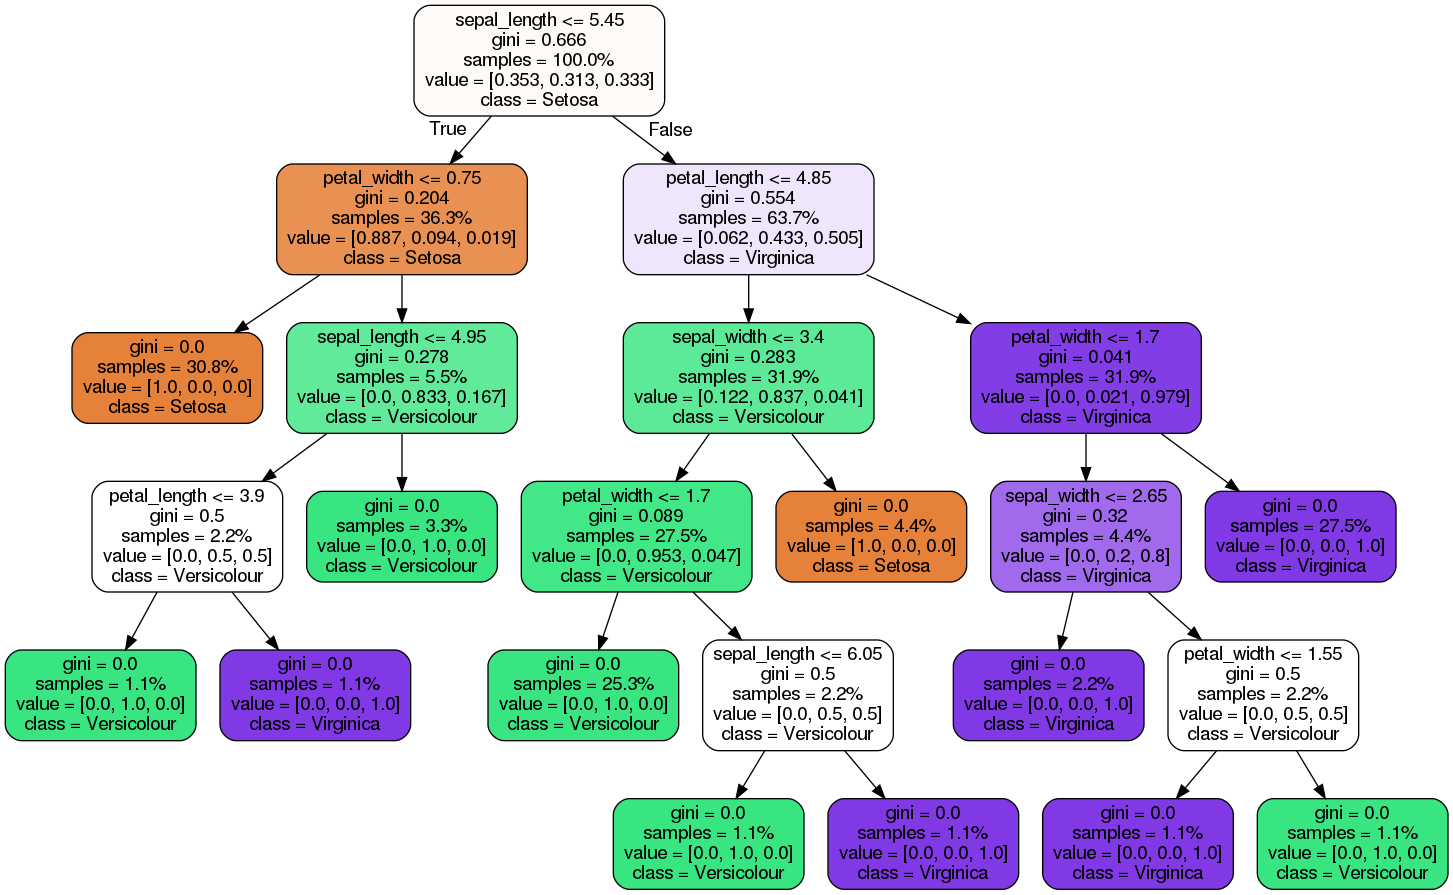

In [55]:
from sklearn.tree import export_graphviz

graph = Source(export_graphviz(single_tree, out_file=None, feature_names=chosen_columns,
                               class_names = class_labels, proportion = True, filled= True, 
                               rounded = True))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)